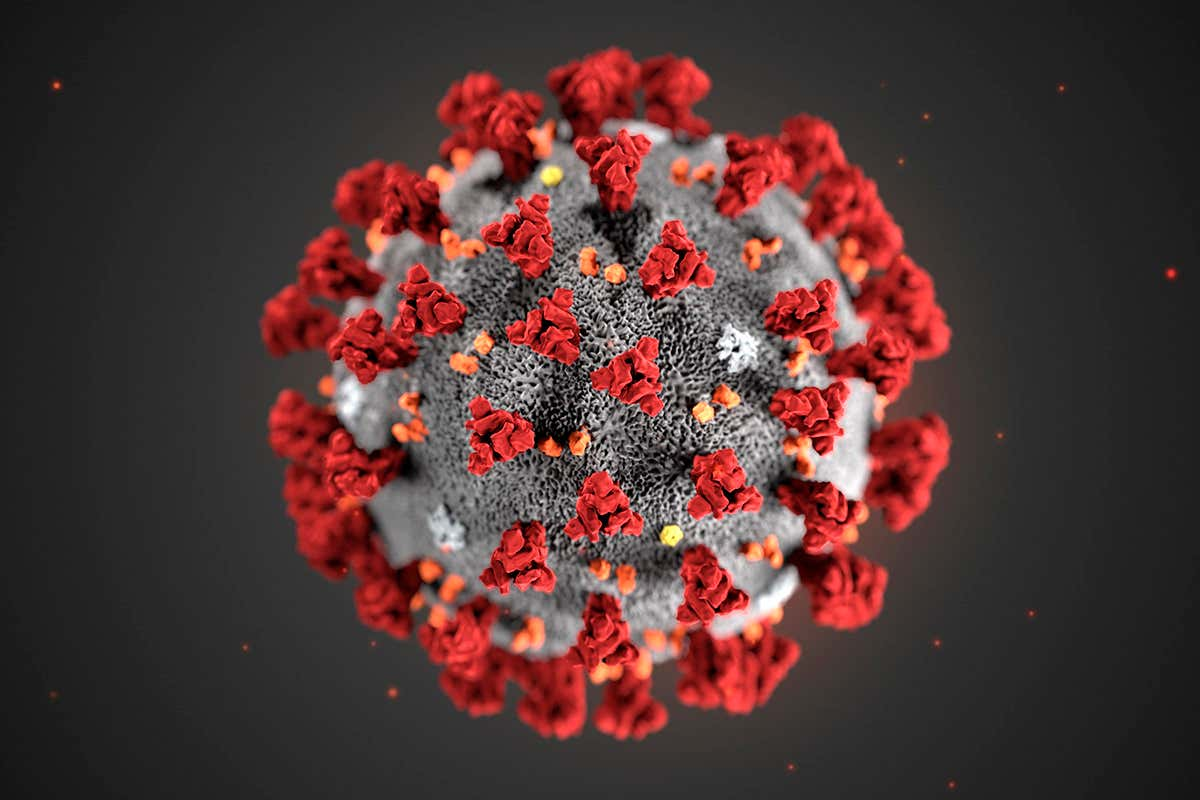

In [124]:
from IPython.display import Image

Image("corona_img.jpg")

# Coronavirus disease (COVID-19) 

is an infectious disease caused by a newly discovered coronavirus.

__Confirmed__
3.58M

__Recovered__
1.17M

__Deaths__
252K

__The following model is trained on covid affected and normal chest xrays and is enabled to  detect COVID-19 using Keras, TensorFlow, and Deep Learning.__

In [125]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import os

import tensorflow as tf
from tensorflow.keras.layers import Flatten, Conv2D, AveragePooling2D, Dense,BatchNormalization,MaxPooling2D,MaxPool2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 



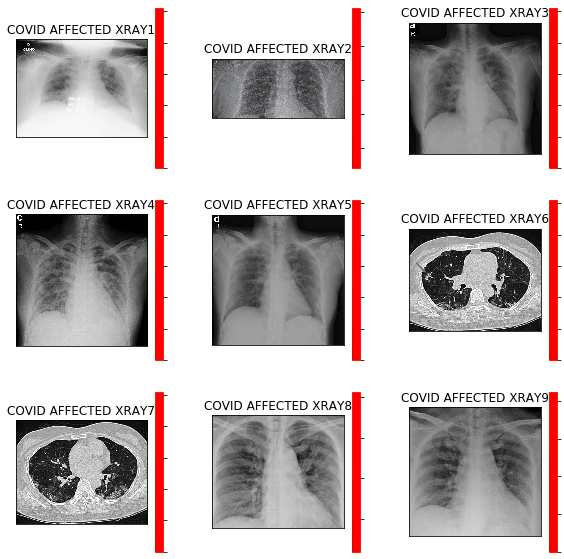

In [126]:
#let us plot some images of covid xrays

images = os.listdir(os.getcwd()+'\\covid\\')
fig = plt.figure(figsize=(10, 10))
for i in range(0,9):
    plt.subplot(3,3,i+1)
    plt.imshow(plt.imread(os.getcwd()+'\\covid\\'+images[i]), cmap='gray')
    color_bar = plt.colorbar()  
    color_bar.ax.set_yticklabels([])
    color_bar.outline.set_color('r')
    plt.xticks([])
    plt.yticks([])
    plt.title('COVID AFFECTED XRAY'+str(i+1 ))

.


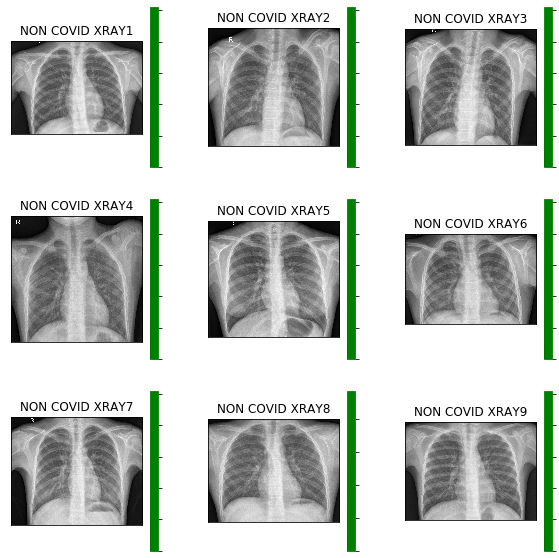

In [127]:
print(os.curdir)
images =  os.listdir(os.getcwd()+'\\normal\\')
fig = plt.figure(figsize=(10, 10))
for i in range(0,9):
    plt.subplot(3,3,i+1)
    plt.imshow(plt.imread(os.getcwd()+'\\normal\\'+images[i]), cmap='gray')
    color_bar = plt.colorbar()  
    color_bar.ax.set_yticklabels([])
    color_bar.outline.set_color('g')
    plt.xticks([])
    plt.yticks([])
    plt.title('NON COVID XRAY'+str(i+1 ))

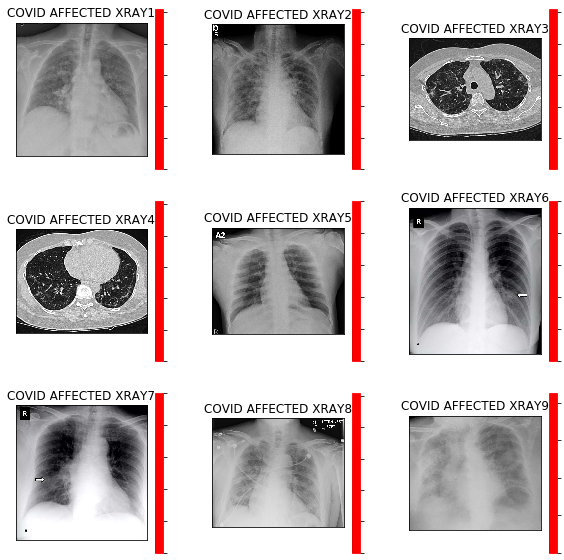

In [128]:
#let us plot some images of covid xraysfrom validation set

images = os.listdir(os.getcwd()+'\\covid_val\\')
fig = plt.figure(figsize=(10, 10))
for i in range(0,9):
    plt.subplot(3,3,i+1)
    plt.imshow(plt.imread(os.getcwd()+'\\covid_val\\'+images[i]), cmap='gray')
    color_bar = plt.colorbar()  
    color_bar.ax.set_yticklabels([])
    color_bar.outline.set_color('r')
    plt.xticks([])
    plt.yticks([])
    plt.title('COVID AFFECTED XRAY'+str(i+1 ))

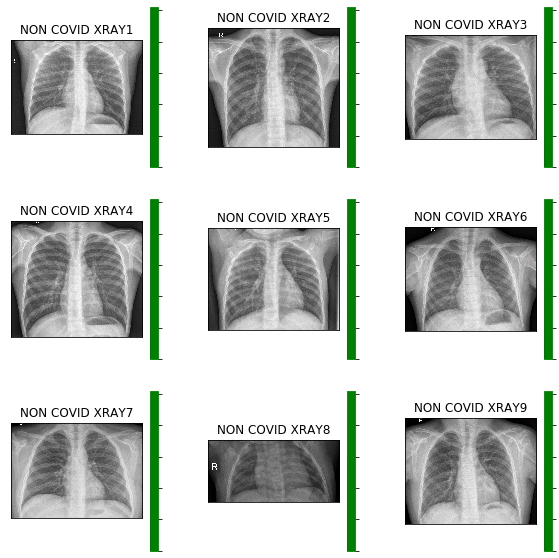

In [129]:
#let us plot some images of noram xraysfrom validation set

images = os.listdir(os.getcwd()+'\\normal_val\\')
fig = plt.figure(figsize=(10, 10))
for i in range(0,9):
    plt.subplot(3,3,i+1)
    plt.imshow(plt.imread(os.getcwd()+'\\normal_val\\'+images[i]), cmap='gray')
    color_bar = plt.colorbar()  
    color_bar.ax.set_yticklabels([])
    color_bar.outline.set_color('g')
    plt.xticks([])
    plt.yticks([])
    plt.title('NON COVID XRAY'+str(i+1 ))

In [130]:
X_train=[]
y_train=[]


X_val=[]
y_val=[]

In [131]:
train_path = os.getcwd()+'\\covid\\'
images = os.listdir(train_path)
for image in images:
    if "jpeg" in image:
         try:
            img = cv2.imread(train_path+image)
            image = cv2.resize(img,(64,64))
            X_train.append(image)
            y_train.append(1)
         except:
            continue;
   

In [132]:
train_path = os.getcwd()+'\\normal\\'
images = os.listdir(train_path)
for image in images:
    if "jpeg" in image:
         try:
            img = cv2.imread(train_path+image)
            image = cv2.resize(img,(64,64))
            X_train.append(image)
            y_train.append(0)
         except:
            continue;
    

In [133]:
val_path = os.getcwd()+'\\covid_val\\'
images = os.listdir(val_path)
for image in images:
    if "jpeg" in image:
         try:
            img = cv2.imread(val_path+image)
            image = cv2.resize(img,(64,64))
            X_val.append(image)
            y_val.append(1)
         except:
            continue;
   

In [134]:
val_path = os.getcwd()+'\\normal_val\\'
images = os.listdir(val_path)
for image in images:
    if "jpeg" in image:
        try:
            img = cv2.imread(val_path+image)
            image = cv2.resize(img,(64,64))
            X_val.append(image)
            y_val.append(0)
        except:
            continue;
            
    

In [135]:
print(X_train[0].shape)
print(X_val[0].shape)



(64, 64, 3)
(64, 64, 3)


In [136]:
print("Xtrain size", len(X_train))
print("ytrain size", len(y_train))

print("Xval size", len(X_val))
print("yval size", len(y_val))

Xtrain size 272
ytrain size 272
Xval size 103
yval size 103


In [137]:
import numpy as np
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)

X_val = np.asarray(X_val)
y_val = np.asarray(y_val)

X_train = X_train.astype('float32')
X_val =  X_val.astype('float32')

In [138]:
print(X_train[0].shape)
print(X_val[0].shape)


print(y_train.shape)
print(y_val.shape)

print(len(X_train))
print(len(y_train))



(64, 64, 3)
(64, 64, 3)
(272,)
(103,)
272
272


In [139]:
  model = Sequential()
  model.add(Conv2D(filters=6, kernel_size=(5,5), strides=(1,1), activation='relu', input_shape=(64,64,3),  name='conv1'))
  model.add(AveragePooling2D(pool_size=(2,2), strides=(2,2)))
  model.add(BatchNormalization())
  model.add(Conv2D(filters=4, kernel_size=(14,14), strides=(1,1), activation='relu',name='conv2'))
  model.add(AveragePooling2D(pool_size=(5,5), strides=(1,1)))
  model.add(BatchNormalization())
  model.add(Conv2D(filters=3, kernel_size=(5,5), strides=(2,2), activation='relu',name='conv3'))
  model.add(Flatten())
  model.add(Dense(820, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dense(54, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dense(27, activation='relu'))
  model.add(Dense(2, activation='softmax'))
  model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [140]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv2D)               (None, 60, 60, 6)         456       
_________________________________________________________________
average_pooling2d_12 (Averag (None, 30, 30, 6)         0         
_________________________________________________________________
batch_normalization_24 (Batc (None, 30, 30, 6)         24        
_________________________________________________________________
conv2 (Conv2D)               (None, 17, 17, 4)         4708      
_________________________________________________________________
average_pooling2d_13 (Averag (None, 13, 13, 4)         0         
_________________________________________________________________
batch_normalization_25 (Batc (None, 13, 13, 4)         16        
_________________________________________________________________
conv3 (Conv2D)               (None, 5, 5, 3)          

In [141]:
history = model.fit(X_train,y_train, epochs=50, validation_data=(X_val,y_val), batch_size=32)

Train on 272 samples, validate on 103 samples
Epoch 1/50
272/272 [==============================] - 3s 9ms/sample - loss: 0.5427 - accuracy: 0.7463 - val_loss: 0.7459 - val_accuracy: 0.6990
Epoch 2/50
272/272 [==============================] - 1s 4ms/sample - loss: 0.2137 - accuracy: 0.8971 - val_loss: 0.6077 - val_accuracy: 0.6990
Epoch 3/50
272/272 [==============================] - 1s 3ms/sample - loss: 0.1556 - accuracy: 0.9522 - val_loss: 0.5100 - val_accuracy: 0.7184
Epoch 4/50
272/272 [==============================] - 1s 3ms/sample - loss: 0.1033 - accuracy: 0.9743 - val_loss: 0.6395 - val_accuracy: 0.6699
Epoch 5/50
272/272 [==============================] - 1s 4ms/sample - loss: 0.0893 - accuracy: 0.9669 - val_loss: 0.5158 - val_accuracy: 0.8932
Epoch 6/50
272/272 [==============================] - 1s 4ms/sample - loss: 0.0860 - accuracy: 0.9816 - val_loss: 0.4888 - val_accuracy: 0.7282
Epoch 7/50
272/272 [==============================] - 1s 4ms/sample - loss: 0.0447 - accur

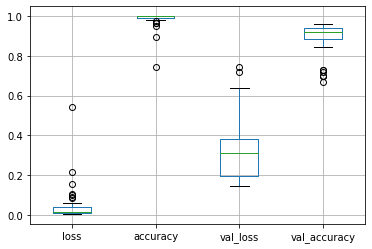

In [142]:
import pandas as pd
history_df = pd.DataFrame(history.history)
history_df.boxplot()

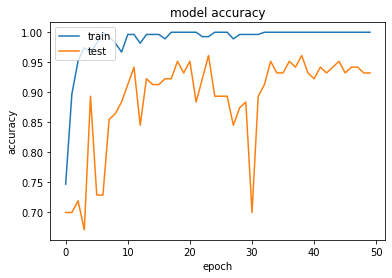

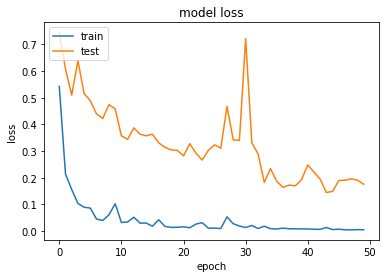

In [143]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [144]:
y_predictions = model.predict(X_val).argmax(1)


# Confusion Matrix

In [150]:
results = confusion_matrix(y_val, y_predictions)

print(results)

[[67  5]
 [ 2 29]]


# Accuracy

In [146]:
accuracy_score(y_val, y_predictions)

0.9320388349514563

Enter a index to test the prediction  1


([], <a list of 0 Text yticklabel objects>)

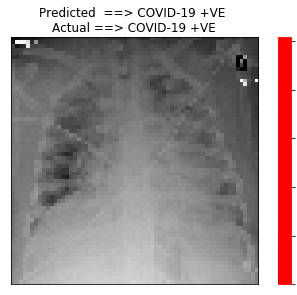

In [157]:
index = int(input('Enter a index to test the prediction  '))
plt.imshow(X_val[index].astype('uint8'))
color_bar = plt.colorbar()  
color_bar.ax.set_yticklabels([])
plt.tight_layout()
actual=''
predicted=''
if(y_predictions[index]==0):
    predicted='NORMAL'
    color_bar.outline.set_color('g')    
else: 
    predicted = 'COVID-19 +VE'
    color_bar.outline.set_color('r')    
    
if(y_val[index]==0):
    actual='NORMAL'
else: 
    actual = 'COVID-19 +VE'
     
    
plt.title("Predicted  ==> "+predicted +" \nActual ==> "+ actual )
plt.xticks([])
plt.yticks([])
                          
 
